# Related to heatmap in Figure 4D

In [1]:
suppressMessages({library(RColorBrewer)
library(glue)
library(ggplot2)
library(msigdbr)
library(ggplot2)
library(glue)
library(dplyr)
library(Seurat)
library(pheatmap)})


In [2]:
obj_merged <- readRDS('/data/yuchen_data/Stereo_seq/All_Figures/version2/Figure4/1.data/all_tls_NaiveGCB.rds')

In [3]:
gene_list = c("TPH2", "CAT", "CYP1A2", "OGDHL", "AFMID", "KYNU", "MAOB", "ALDH1B1", "ECHS1", "AANAT",  "AOX1", "ALDH2", "TDO2", "IDO1", "INMT", "ALDH3A2","OGDH", "DDC",  "ACAT1", "MAOA", "ACMSD", "HAAO", "EHHADH", "IDO2", "GCDH",  "HADHA", "ALDH7A1","CYP1A1", "IL4I1", "ALDH9A1",  "AADAT", "KMO", "HADH", "WARS2", "TPH1", "CYP1B1")
# obj_merged <- AddModuleScore(obj_merged, gl)

obj_merged <- subset(obj_merged, TLS_maturity != 'Conforming')
obj_merged$Group = paste0(obj_merged$TLS_maturity, '_', obj_merged$CellSubType)
obj_merged$Group <- factor(obj_merged$Group, levels=c('Mature_GCB', 'Mature_Bnaive', 'Deviating_GCB', 'Deviating_Bnaive'))

obj_merged <- SetIdent(obj_merged, value=obj_merged$Group)

df_expr = AverageExpression(obj_merged, features=gene_list, assays='Spatial', slot='data')
df_plot = t(df_expr$Spatial)
df_plot = scale(df_plot)

gene_order = c("TPH2", "CAT", "CYP1A2", "OGDHL", "AFMID", "KYNU", "MAOB", "ALDH1B1", "ECHS1", "AANAT",  "AOX1", "ALDH2", "TDO2", "IDO1", "INMT", "ALDH3A2","OGDH", "DDC",  "ACAT1", "MAOA", "ACMSD", "HAAO", "EHHADH", "IDO2", "GCDH",  "HADHA", "ALDH7A1","CYP1A1", "IL4I1", "ALDH9A1",  "AADAT", "KMO", "HADH", "WARS2", "TPH1", "CYP1B1")
df_plot = data.frame(df_plot)[, gene_order]

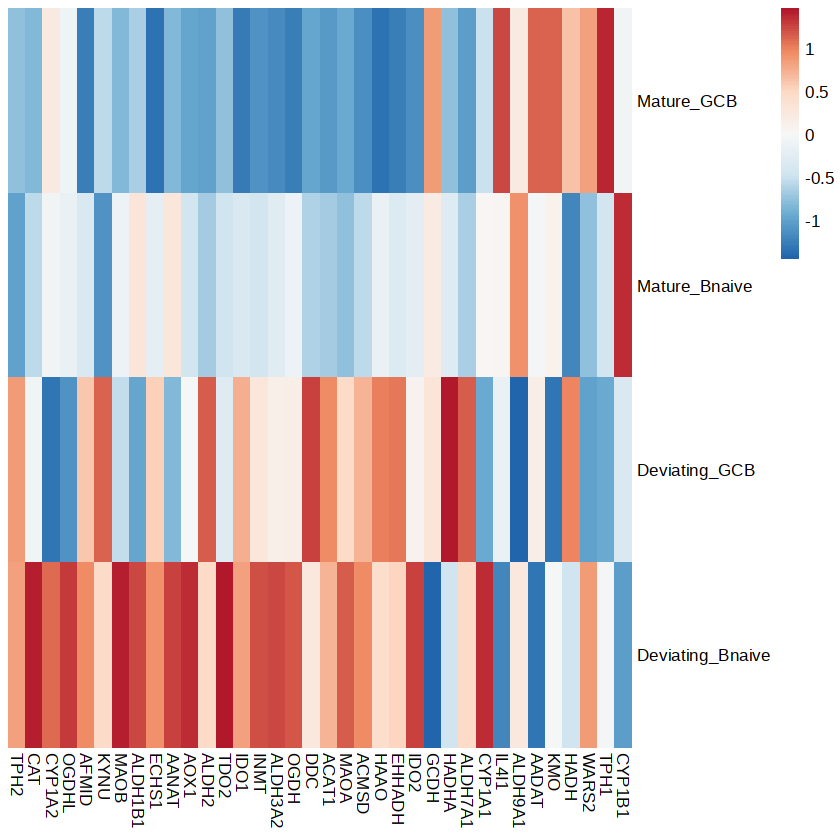

In [4]:
pheatmap(df_plot, cluster_cols=F, cluster_rows=F, scale = "none", treeheight_col=0, border_color=NA, color = colorRampPalette(rev(brewer.pal(n = 7, name ="RdBu")))(100))

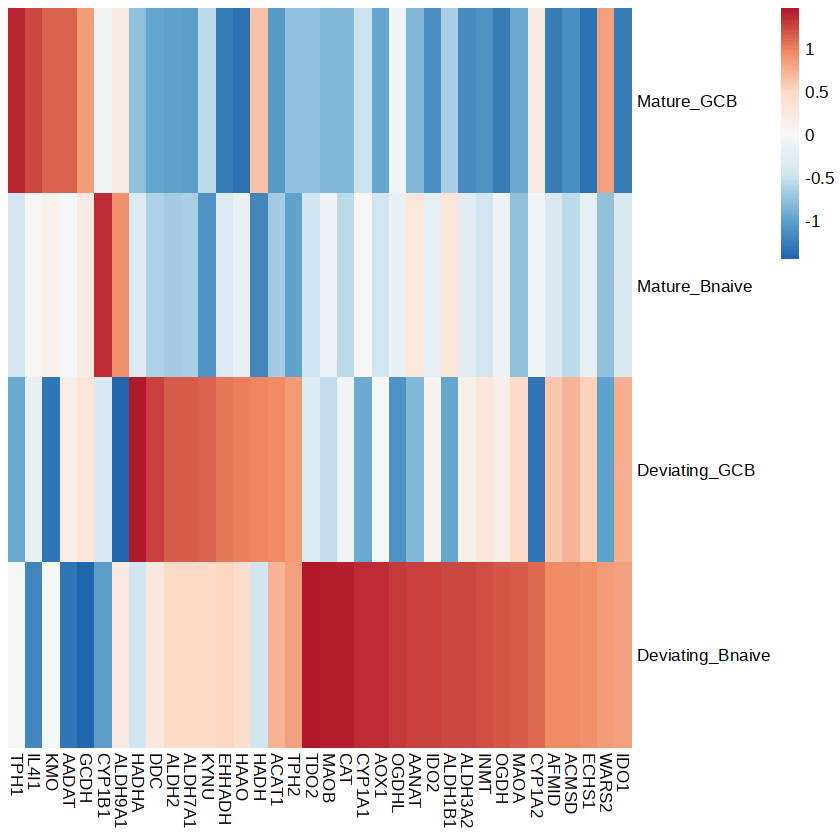

In [5]:
col_order <- c('Mature_GCB', 'Mature_Bnaive', 'Deviating_GCB', 'Deviating_Bnaive')
df_plot = as.data.frame(t(df_plot))
df_plot$max_idx = apply(df_plot,1,which.max)

df_sort_merged <- data.frame(t(data.frame(row.names=c(col_order, 'max_idx'))))
for (idx in 1:length(col_order)) {
    df_cur = subset(df_plot, subset=max_idx==idx)
    ct_cur = col_order[idx]
    df_cur = df_cur[rev(order(df_cur[[ct_cur]])), ]
    df_sort_merged <- rbind(df_sort_merged,  df_cur)
}

df_sort_merged$max_idx = NULL

pheatmap(t(df_sort_merged), cluster_cols=F, cluster_rows=F, scale = "none", treeheight_col=0, border_color=NA, color = colorRampPalette(rev(brewer.pal(n = 7, name ="RdBu")))(100))